In [4]:
#from google.colab import drive

#drive.mount('/content/gdrive')
df1 = pd.read_csv('traffic_main.csv')
df1.head(15)

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,55.0,78.0,690.0,55.0,2014/02/13 11:35:00,8.0,190471.0,158355.0
1,OK,55.0,78.0,690.0,55.0,2014/02/13 11:40:00,11.0,190920.0,158355.0
2,OK,57.0,75.0,690.0,57.0,2014/02/13 11:45:00,6.0,191369.0,158355.0
3,OK,55.0,78.0,690.0,55.0,2014/02/13 11:50:00,5.0,191818.0,158355.0
4,OK,54.0,79.0,690.0,54.0,2014/02/13 11:55:00,10.0,192267.0,158355.0
5,OK,54.0,79.0,690.0,54.0,2014/02/13 12:00:00,12.0,192716.0,158355.0
6,OK,54.0,79.0,690.0,54.0,2014/02/13 12:05:00,8.0,193165.0,158355.0
7,OK,46.0,93.0,690.0,46.0,2014/02/13 12:10:00,13.0,193614.0,158355.0
8,OK,46.0,93.0,690.0,46.0,2014/02/13 12:15:00,12.0,194063.0,158355.0
9,OK,55.0,78.0,690.0,55.0,2014/02/13 12:20:00,11.0,194512.0,158355.0


In [1]:
import math


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import time

import os


# read the dataset into python
df = pd.read_csv('traffic_main.csv')
df.head()   #credit goes to @abhay veere


ass=df["avgSpeed"]
avM=max(ass)
print(avM)
avM
spi=[]
for s in ass:
    t=(s/avM)*100
    spi.append(t)

len(spi)
df.insert(9,"SPI",spi,True)   #credit goes to @mandeep & @tarun veere

ass=df["avgSpeed"]
avM=max(ass)

avM
sri=[]
for s in ass:
    t=(1-(s/avM))*10
    sri.append(t)

len(sri)
df.insert(10,"SRI",sri,True)

df.shape
df.head(20)



149.0


,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID,SPI,SRI
0,OK,55.0,78.0,690.0,55.0,2014/02/13 11:35:00,8.0,190471.0,158355.0,52.348993,4.765101
1,OK,55.0,78.0,690.0,55.0,2014/02/13 11:40:00,11.0,190920.0,158355.0,52.348993,4.765101
2,OK,57.0,75.0,690.0,57.0,2014/02/13 11:45:00,6.0,191369.0,158355.0,50.335570,4.966443
3,OK,55.0,78.0,690.0,55.0,2014/02/13 11:50:00,5.0,191818.0,158355.0,52.348993,4.765101
4,OK,54.0,79.0,690.0,54.0,2014/02/13 11:55:00,10.0,192267.0,158355.0,53.020134,4.697987
5,OK,54.0,79.0,690.0,54.0,2014/02/13 12:00:00,12.0,192716.0,158355.0,53.020134,4.697987
6,OK,54.0,79.0,690.0,54.0,2014/02/13 12:05:00,8.0,193165.0,158355.0,53.020134,4.697987
7,OK,46.0,93.0,690.0,46.0,2014/02/13 12:10:00,13.0,193614.0,158355.0,62.416107,3.758389
8,OK,46.0,93.0,690.0,46.0,2014/02/13 12:15:00,12.0,194063.0,158355.0,62.416107,3.758389
9,OK,55.0,78.0,690.0,55.0,2014/02/13 12:20:00,11.0,194512.0,158355.0,52.348993,4.765101


In [5]:
df['date_time'] = pd.to_datetime(df['TIMESTAMP'])
df['SRI'] = pd.to_numeric(df['SRI'], errors='coerce')
df = df.dropna(subset=['SRI'])

df['date_time'] = pd.to_datetime(df['date_time'])

df = df.loc[:, ['date_time', 'SRI']]
df.sort_values('date_time', ascending=True)
df = df.reset_index(drop=True)

print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df['date_time'].min())
print('The time series ends on: ', df['date_time'].max())
df.head(10)

Number of rows and columns after removing missing values: (507513, 2)
The time series starts from:  2014-02-13 11:30:00
The time series ends on:  2014-06-09 05:35:00


,date_time,SRI
0,2014-02-13 11:35:00,4.765101
1,2014-02-13 11:40:00,4.765101
2,2014-02-13 11:45:00,4.966443
3,2014-02-13 11:50:00,4.765101
4,2014-02-13 11:55:00,4.697987
5,2014-02-13 12:00:00,4.697987
6,2014-02-13 12:05:00,4.697987
7,2014-02-13 12:10:00,3.758389
8,2014-02-13 12:15:00,3.758389
9,2014-02-13 12:20:00,4.765101


In [6]:
df.info()

df.head(-10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507513 entries, 0 to 507512
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  507513 non-null  datetime64[ns]
 1   SRI        507513 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 MB


,date_time,SRI
0,2014-02-13 11:35:00,4.765101
1,2014-02-13 11:40:00,4.765101
2,2014-02-13 11:45:00,4.966443
3,2014-02-13 11:50:00,4.765101
4,2014-02-13 11:55:00,4.697987
...,...,...
507498,2014-06-09 03:05:00,4.228188
507499,2014-06-09 03:10:00,4.228188
507500,2014-06-09 03:15:00,4.228188
507501,2014-06-09 03:35:00,4.228188


In [7]:
test_cutoff_date = df['date_time'].max() - timedelta(days=1)
val_cutoff_date = test_cutoff_date - timedelta(days=2)

df_test = df[df['date_time'] > test_cutoff_date]
df_val = df[(df['date_time'] > val_cutoff_date) & (df['date_time'] <= test_cutoff_date)]
df_train = df[df['date_time'] <= val_cutoff_date]

#check out the datasets
print('Test dates: {} to {}'.format(df_test['date_time'].min(), df_test['date_time'].max()))
print('Validation dates: {} to {}'.format(df_val['date_time'].min(), df_val['date_time'].max()))
print('Train dates: {} to {}'.format(df_train['date_time'].min(), df_train['date_time'].max()))
df.shape

Test dates: 2014-06-08 05:40:00 to 2014-06-09 05:35:00
Validation dates: 2014-06-06 05:40:00 to 2014-06-08 05:35:00
Train dates: 2014-02-13 11:30:00 to 2014-06-06 05:35:00


(507513, 2)

In [8]:
def create_ts_files(dataset, 
                    start_index, 
                    end_index, 
                    history_length, 
                    step_size, 
                    target_step, 
                    num_rows_per_file, 
                    data_folder):
    assert step_size > 0
    assert start_index >= 0
    
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
    
    time_lags = sorted(range(target_step+1, target_step+history_length+1, step_size), reverse=True)
    col_names = [f'x_lag{i}' for i in time_lags] + ['y']
    start_index = start_index + history_length
    if end_index is None:
        print(len(dataset),target_step)
        end_index = len(dataset) - target_step
    print(start_index,end_index)
    rng = range(start_index, end_index)
    num_rows = len(rng)
    num_files = math.ceil(num_rows/num_rows_per_file)
    
    # for each file.
    print(f'Creating {num_files} files.')
    for i in range(num_files):
        print(i)
        filename = f'{data_folder}/ts_file{i}.pkl'
        
        if i % 10 == 0:
            print(f'{filename}')
            
        # get the start and end indices.
        ind0 = i*num_rows_per_file
        ind1 = min(ind0 + num_rows_per_file, end_index)
        data_list = []
        
        # j in the current timestep. Will need j-n to j-1 for the history. And j + target_step for the target.
        for j in range(ind0, ind1):
            indices = range(j-1, j-history_length-1, -step_size)
            data = dataset[sorted(indices) + [j+target_step]]
            
            # append data to the list.
            data_list.append(data)

        df_ts = pd.DataFrame(data=data_list, columns=col_names)
        df_ts.to_pickle(filename)
            
    return len(col_names)-1

In [9]:
vehicle_Count = df_train['SRI'].values

# Scaled to work with Neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
vehicle_Count_scaled = scaler.fit_transform(vehicle_Count.reshape(-1, 1)).reshape(-1, )

history_length = 1*24*60  # The history length in minutes.
step_size = 5  # The sampling rate of the history. Eg. If step_size = 1, then values from every minute will be in the history.
                #                                       If step size = 10 then values every 10 minutes will be in the history.
target_step = 5  # The time step in the future to predict. Eg. If target_step = 0, then predict the next timestep after the end of the history period.
                  #                                             If target_step = 10 then predict 10 timesteps the next timestep (11 minutes after the end of history).

# The csv creation returns the number of rows and number of features. We need these values below.
num_timesteps = create_ts_files(vehicle_Count_scaled,
                                start_index=0,
                                end_index=None,
                                history_length=history_length,
                                step_size=step_size,
                                target_step=target_step,
                                num_rows_per_file=128*100,
                                data_folder='ts_data')

499676 5
1440 499671
Creating 39 files.
0
ts_data/ts_file0.pkl
1
2
3
4
5
6
7
8
9
10
ts_data/ts_file10.pkl
11
12
13
14
15
16
17
18
19
20
ts_data/ts_file20.pkl
21
22
23
24
25
26
27
28
29
30
ts_data/ts_file30.pkl
31
32
33
34
35
36
37
38


In [10]:
class TimeSeriesLoader:
    def __init__(self, ts_folder, filename_format):
        self.ts_folder = ts_folder
        
        # find the number of files.
        i = 0
        file_found = True
        while file_found:
            filename = self.ts_folder + '/' + filename_format.format(i)
            file_found = os.path.exists(filename)
            if file_found:
                i += 1
                
        self.num_files = i
        self.files_indices = np.arange(self.num_files)
        self.shuffle_chunks()
        
    def num_chunks(self):
        return self.num_files
    
    def get_chunk(self, idx):
        assert (idx >= 0) and (idx < self.num_files)
        
        ind = self.files_indices[idx]
        filename = self.ts_folder + '/' + filename_format.format(ind)
        df_ts = pd.read_pickle(filename)
        num_records = len(df_ts.index)
        
        features = df_ts.drop('y', axis=1).values
        target = df_ts['y'].values
        
        # reshape for input into LSTM. Batch major format.
        features_batchmajor = np.array(features).reshape(num_records, -1, 1)
        return features_batchmajor, target
    
    # this shuffles the order the chunks will be outputted from get_chunk.
    def shuffle_chunks(self):
        np.random.shuffle(self.files_indices)

In [11]:
ts_folder = 'ts_data'
filename_format = 'ts_file{}.pkl'
tss = TimeSeriesLoader(ts_folder, filename_format)

In [12]:
ts_inputs = tf.keras.Input(shape=(num_timesteps, 1))

# units=10 -> The cell and hidden states will be of dimension 10.
#             The number of parameters that need to be trained = 4*units*(units+2)
x = layers.LSTM(units=10)(ts_inputs)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='linear')(x)  #LeakyReLU,softmax, linear    
model = tf.keras.Model(inputs=ts_inputs, outputs=outputs)

In [13]:

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])
'''
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
'''

# I have to try different loss function like entropy, cross entropy etc=====loss function
# Activation Function: Sigmoid, relu, leeki-relu, hyperbolic tangent etc
# Training algo: SGD with adam optimizer
# agar training accuracy and testing accuracy jada farak nhi toh droupout intensity increase krna hai(model me overfitting ho rhi hai)
# agar phir bhi accuracy nhi sudhri then I need to change model archit... model archit = number of neurons in hidden layer.

"\nopt = keras.optimizers.Adam(learning_rate=0.01)\nmodel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])\n"

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 288, 1)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [15]:
BATCH_SIZE = 128
NUM_EPOCHS = 10
NUM_CHUNKS = tss.num_chunks()

for epoch in range(NUM_EPOCHS):
    print('epoch #{}'.format(epoch))
    for i in range(NUM_CHUNKS):
        X, y = tss.get_chunk(i)
        
        # model.fit does train the model incrementally. ie. Can call multiple times in batches.
        # https://github.com/keras-team/keras/issues/4446
        model.fit(x=X, y=y, batch_size=BATCH_SIZE)
        
    # shuffle the chunks so they're not in the same order next time around.
    tss.shuffle_chunks()

epoch #0
100/100 [==============================] - 6s 60ms/step - loss: 0.0078 - mse: 0.0078
epoch #1
100/100 [==============================] - 6s 64ms/step - loss: 0.0072 - mse: 0.0072
epoch #2
100/100 [==============================] - 6s 61ms/step - loss: 0.0050 - mse: 0.0050


100/100 [==============================] - 6s 63ms/step - loss: 0.0108 - mse: 0.0108: 1s -
epoch #3
100/100 [==============================] - 6s 62ms/step - loss: 0.0155 - mse: 0.0155
epoch #4
100/100 [==============================] - 6s 59ms/step - loss: 0.0061 - mse: 0.0061


100/100 [==============================] - 6s 59ms/step - loss: 0.0079 - mse: 0.0079
epoch #5
100/100 [==============================] - 6s 61ms/step - loss: 0.0049 - mse: 0.0049
epoch #6
100/100 [==============================] - 6s 60ms/step - loss: 0.0057 - mse: 0.0057
epoch #7
100/100 [==============================] - 6s 60ms/step - loss: 0.0078 - mse: 0.0078


100/100 [==============================] - 6s 58ms/step - loss: 0.0072 - mse: 0.0072
epoch #8
100/100 [==============================] - 6s 59ms/step - loss: 0.0068 - mse: 0.0068
epoch #9
100/100 [==============================] - 6s 60ms/step - loss: 0.0070 - mse: 0.0070


100/100 [==============================] - 6s 62ms/step - loss: 0.0055 - mse: 0.0055


In [16]:
vehicle_Count_val = df_val['SRI'].values   
# scaler = MinMaxScaler(feature_range=(0, 1))

vehicle_Count_val_scaled = scaler.transform(vehicle_Count_val.reshape(-1, 1)).reshape(-1, )
# print(vehicle_Count_val_scaled)
history_length = 1*24*60  # The history length in minutes.
step_size = 5  # The sampling rate of the history. Eg. If step_size = 1, then values from every minute will be in the history.
                #                                       If step size = 10 then values every 10 minutes will be in the history.
target_step = 5  # The time step in the future to predict. Eg. If target_step = 0, then predict the next timestep after the end of the history period.
                  #                                             If target_step = 10 then predict 10 timesteps the next timestep (11 minutes after the end of history).

# The csv creation returns the number of rows and number of features. We need these values below.
num_timesteps = create_ts_files(vehicle_Count_val_scaled,
                                start_index=0,
                                end_index=None,
                                history_length=history_length,
                                step_size=step_size,
                                target_step=target_step,
                                num_rows_per_file=128*100,
                                data_folder='/content/gdrive/MyDrive/traffic data/ts_val_data')

4763 5
1440 4758
Creating 1 files.
0
/content/gdrive/MyDrive/traffic data/ts_val_data/ts_file0.pkl


In [17]:
df_val_ts = pd.read_pickle('ts_file0.pkl')


features = df_val_ts.drop('y', axis=1).values
features_arr = np.array(features)

# reshape for input into LSTM. Batch major format.
num_records = len(df_val_ts.index)
features_batchmajor = features_arr.reshape(num_records, -1, 1)


y_pred = model.predict(features_batchmajor).reshape(-1, )
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1 ,)

y_act = df_val_ts['y'].values
y_act = scaler.inverse_transform(y_act.reshape(-1, 1)).reshape(-1 ,)

print('validation mean squared error: {}'.format(math.sqrt(mean_squared_error(y_act, y_pred))))

#baseline
y_pred_baseline = df_val_ts['x_lag11'].values
y_pred_baseline = scaler.inverse_transform(y_pred_baseline.reshape(-1, 1)).reshape(-1 ,)
print('validation baseline mean squared error: {}'.format(math.sqrt(mean_squared_error(y_act, y_pred_baseline))))


validation mean squared error: 0.8908076043691341
validation baseline mean squared error: 0.9926964013256331


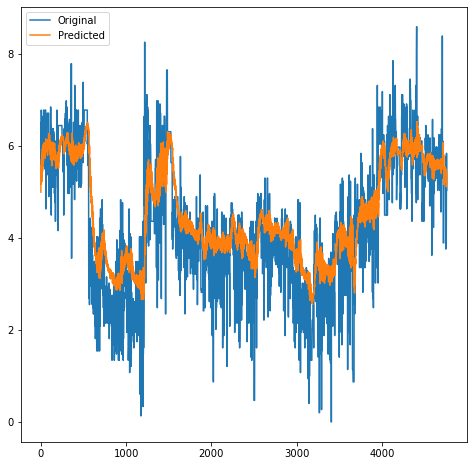

In [18]:
import matplotlib.pyplot as pp
pp.figure(figsize=[8,8])
pp.plot(range(len(y_act)), y_act)
pp.plot(range(len(y_pred)), y_pred)
pp.legend(['Original', 'Predicted'])
pp.show()

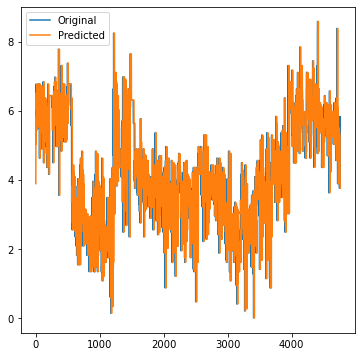

In [19]:
import matplotlib.pyplot as pp
pp.figure(figsize=[6,6])
pp.plot(range(len(y_act)), y_act)
pp.plot(range(len(y_pred_baseline)), y_pred_baseline)
pp.legend(['Original', 'Predicted'])
pp.show()